In [6]:
import pandas as pd

# Load the dataset
file_path = 'Vehicle MPG - 1984 to 2023.csv'
data = pd.read_csv(file_path)

# Drop the 'Model' column
data_dropped = data.drop('Model', axis=1)

# Check for missing values
missing_data_summary = data_dropped.isnull().sum()

# Determine the types of each column to identify categorical vs numeric columns
column_types = data_dropped.dtypes

missing_data_summary, column_types


(ID                                                     0
 Model Year                                             0
 Make                                                   0
 Estimated Annual Petrolum Consumption (Barrels)        0
 Fuel Type 1                                            0
 City MPG (Fuel Type 1)                                 0
 Highway MPG (Fuel Type 1)                              0
 Combined MPG (Fuel Type 1)                             0
 Fuel Type 2                                        44059
 City MPG (Fuel Type 2)                                 0
 Highway MPG (Fuel Type 2)                              0
 Combined MPG (Fuel Type 2)                             0
 Engine Cylinders                                     487
 Engine Displacement                                  485
 Drive                                               1186
 Engine Description                                 17031
 Transmission                                          11
 Vehicle Class

In [8]:
# Drop the specified columns
data_cleaned = data_dropped.drop(['Fuel Type 2', 'Engine Description'], axis=1)

# Fill missing values for 'Engine Cylinders' and 'Engine Displacement' with their median
# since these are numerical and median is a robust measure for central tendency
for column in ['Engine Cylinders', 'Engine Displacement']:
    median_value = data_cleaned[column].median()
    data_cleaned[column].fillna(median_value, inplace=True)

# Drop rows with any remaining missing values (mostly in 'Drive' and 'Transmission' columns)
data_cleaned.dropna(inplace=True)

# Check again for missing values to ensure clean dataset
final_missing_data_summary = data_cleaned.isnull().sum()
final_missing_data_summary

/var/folders/bv/ghjrxv6j7pl2ttzvdds70ldh0000gn/T/ipykernel_93475/920985396.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(median_value, inplace=True)
/var/folders/bv/ghjrxv6j7pl2ttzvdds70ldh0000gn/T/ipykernel_93475/920985396.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

ID                                                 0
Model Year                                         0
Make                                               0
Estimated Annual Petrolum Consumption (Barrels)    0
Fuel Type 1                                        0
City MPG (Fuel Type 1)                             0
Highway MPG (Fuel Type 1)                          0
Combined MPG (Fuel Type 1)                         0
City MPG (Fuel Type 2)                             0
Highway MPG (Fuel Type 2)                          0
Combined MPG (Fuel Type 2)                         0
Engine Cylinders                                   0
Engine Displacement                                0
Drive                                              0
Transmission                                       0
Vehicle Class                                      0
Time to Charge EV (hours at 120v)                  0
Time to Charge EV (hours at 240v)                  0
Range (for EV)                                

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

# Assuming 'data_cleaned' is your DataFrame after initial preprocessing

# Select categorical columns for one-hot encoding
categorical_columns = ['Make', 'Fuel Type 1', 'Drive', 'Transmission', 'Vehicle Class']
one_hot_encoder = OneHotEncoder()
encoded_categorical = one_hot_encoder.fit_transform(data_cleaned[categorical_columns]).toarray()

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
encoded_categorical_df.index = data_cleaned.index  # To align indices

# Carefully select and verify the numeric columns
numeric_columns = [col for col in data_cleaned.columns if col not in categorical_columns and data_cleaned[col].dtype in ['int64', 'float64']]
scaler = StandardScaler()
normalized_numeric = scaler.fit_transform(data_cleaned[numeric_columns])

# Create a DataFrame from the normalized numeric data
normalized_numeric_df = pd.DataFrame(normalized_numeric, columns=numeric_columns)
normalized_numeric_df.index = data_cleaned.index  # To align indices

# Combine the encoded and normalized data
final_preprocessed_data = pd.concat([encoded_categorical_df, normalized_numeric_df], axis=1)
final_preprocessed_data.head()


,Make_AM General,Make_ASC Incorporated,Make_Acura,Make_Alfa Romeo,Make_American Motors Corporation,Make_Aston Martin,Make_Audi,Make_Aurora Cars Ltd,Make_Autokraft Limited,Make_Azure Dynamics,...,Combined MPG (Fuel Type 2),Engine Cylinders,Engine Displacement,Time to Charge EV (hours at 120v),Time to Charge EV (hours at 240v),Range (for EV),City Range (for EV - Fuel Type 1),City Range (for EV - Fuel Type 2),Hwy Range (for EV - Fuel Type 1),Hwy Range (for EV - Fuel Type 2)
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142095,-0.981780,-0.957931,0.0,-0.114307,-0.095085,-0.078491,-0.063956,-0.077608,-0.066445
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142095,-0.981780,-1.328246,0.0,-0.114307,-0.095085,-0.078491,-0.063956,-0.077608,-0.066445
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142095,1.283939,1.782399,0.0,-0.114307,-0.095085,-0.078491,-0.063956,-0.077608,-0.066445
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142095,1.283939,1.782399,0.0,-0.114307,-0.095085,-0.078491,-0.063956,-0.077608,-0.066445
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142095,0.151079,-0.217301,0.0,-0.114307,-0.095085,-0.078491,-0.063956,-0.077608,-0.066445


In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Prepare the target data (y) and feature data (X)
X = final_preprocessed_data.drop([col for col in final_preprocessed_data.columns if 'Make_' in col], axis=1)
y = final_preprocessed_data[[col for col in final_preprocessed_data.columns if 'Make_' in col]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Overview of the model
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 139)            │         9,035 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,731 (120.04 KB)

 Trainable params: 30,731 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=75, validation_split=0.2, batch_size=32)

Epoch 1/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.1822 - loss: 3.2628 - val_accuracy: 0.3487 - val_loss: 2.1570
Epoch 2/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.3686 - loss: 2.0507 - val_accuracy: 0.4012 - val_loss: 1.8835
Epoch 3/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.4276 - loss: 1.7844 - val_accuracy: 0.4324 - val_loss: 1.7695
Epoch 4/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.4583 - loss: 1.6743 - val_accuracy: 0.4530 - val_loss: 1.6881
Epoch 5/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.4696 - loss: 1.5877 - val_accuracy: 0.4623 - val_loss: 1.6259
Epoch 6/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.4914 - loss: 1.5182 - val_accuracy: 0.4738 - val_loss: 1.5745
Epoch 7/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5023 - loss: 1.4638 - val_accuracy: 0.4781 - val_loss: 1.5496
Epoch 8/75
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.5125 - loss: 1.4205 - 

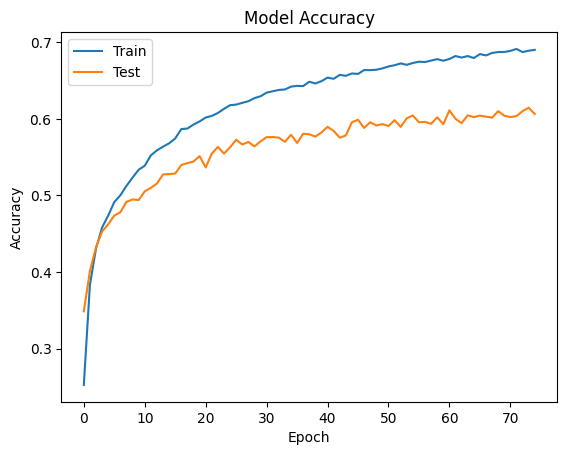

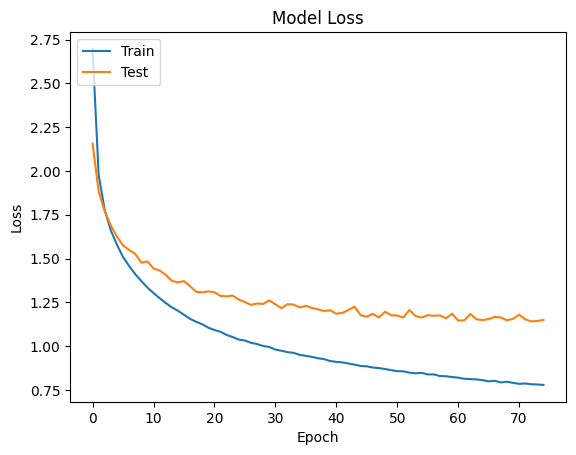

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.6165 - loss: 1.0990
Test Accuracy: 0.6189464330673218


In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Example new data matching the trained model's categories and features
new_data = pd.DataFrame({
    'Model Year': [2020],  # Use a year within the range the model has seen
    'Fuel Type 1': ['Regular Gasoline'],  # Must match one of the categories used during training
    'Drive': ['Front-Wheel Drive'],  # Must match one of the categories used during training
    'Transmission': ['Automatic'],  # Must match one of the categories used during training
    'Vehicle Class': ['Compact'],  # Must match one of the categories used during training
    'City MPG (Fuel Type 1)': [25],  # Ensure the range is typical of what was in training data
    'Highway MPG (Fuel Type 1)': [32],  # Ensure the range is typical of what was in training data
    'Combined MPG (Fuel Type 1)': [28],  # Ensure the range is typical of what was in training data
    'Engine Cylinders': [4],  # Use common values from the dataset
    'Engine Displacement': [2.0]  # Use common values from the dataset
})

# Assuming you've already fitted the OneHotEncoder and StandardScaler during training:
# (Replace 'encoder' and 'scaler' with your actual variables if they have different names)

# Encoding categorical data
categorical_features = ['Fuel Type 1', 'Drive', 'Transmission', 'Vehicle Class']
encoded_features = encoder.transform(new_data[categorical_features]).toarray()
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Normalizing numeric data
numeric_features = ['Model Year', 'City MPG (Fuel Type 1)', 'Highway MPG (Fuel Type 1)', 'Combined MPG (Fuel Type 1)', 'Engine Cylinders', 'Engine Displacement']
scaled_features = scaler.transform(new_data[numeric_features])
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_features)

# Combine all features into one DataFrame
final_features_df = pd.concat([encoded_features_df, scaled_features_df], axis=1)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Load the model if not already in memory
from tensorflow.keras.models import load_model
model = load_model('car_make_prediction_model.h5')

# Make predictions
predictions = model.predict(final_features_df)
predicted_index = np.argmax(predictions, axis=1)

# Assuming you have the labels for each class
makes = encoder.classes_  # The classes should be the same ones used for output during training
predicted_make = makes[predicted_index]
print("Predicted Make:", predicted_make)